In [1]:
!pip install umap-learn
!pip install plotly
!pip install pyvis
!pip install -q tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import plotly.express as px
from sklearn.datasets import load_digits, fetch_olivetti_faces, load_wine, load_breast_cancer
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Randomized PCA

*   Randomized PCA efficiently reduces the dimensionality of the Wine dataset to two principal components.
*   The plot shows that the classes are somewhat separable in the reduced space.



In [20]:
# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for visualization
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Wine Class': y
})

# Map numerical labels to class names
target_names = data.target_names
df_pca['Wine Class Name'] = df_pca['Wine Class'].apply(lambda x: target_names[x])

# Interactive Visualization with Plotly
fig = px.scatter(
    df_pca, x='PC1', y='PC2', color='Wine Class Name',
    hover_data=['Wine Class Name'],
    title='PCA on Wine Dataset'
)

# Update layout
fig.update_layout(
    width=800,
    height=600,
    legend_title='Wine Class',
    template='plotly_dark'
)

fig.show()



# Kernel PCA

*   Kernel PCA with an RBF kernel successfully unfolds the two moons, making them linearly separable.
*   This demonstrates the power of Kernel PCA in capturing nonlinear structures.



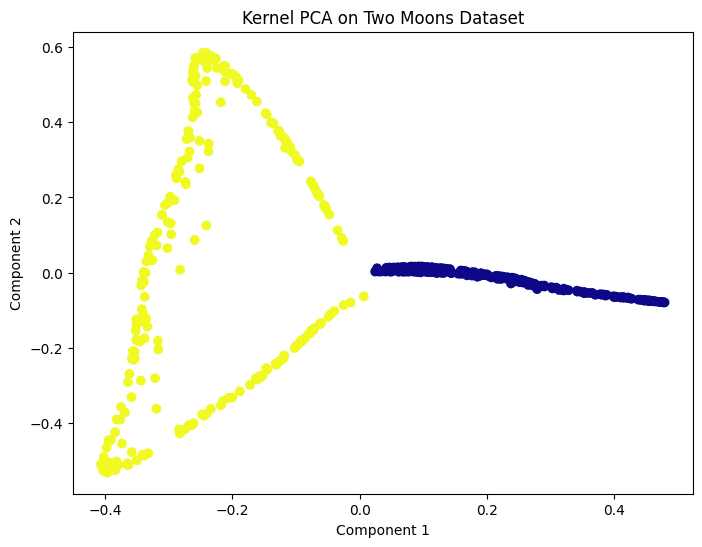

In [8]:
from sklearn.datasets import make_moons

# Generate the dataset
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

# Apply Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X)

# Visualize the results
plt.figure(figsize=(8,6))
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y, cmap='plasma')
plt.title('Kernel PCA on Two Moons Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


# Incremental PCA

*   Incremental PCA processes data in batches, suitable for large datasets like MNIST.
*   The visualization shows overlapping clusters due to the complexity of handwritten digits.



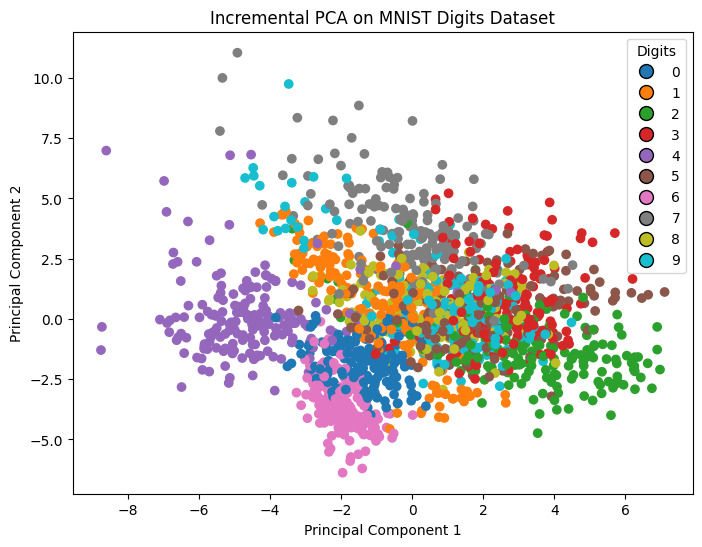

In [10]:
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Apply Incremental PCA
ipca = IncrementalPCA(n_components=2, batch_size=200)
X_ipca = ipca.fit_transform(X_scaled)

# Visualize the results
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_ipca[:,0], X_ipca[:,1], c=y, cmap='tab10')
# Create legend
targets = np.unique(y)
colors = [scatter.cmap(scatter.norm(t)) for t in targets]
labels = targets
# Build custom legend
patches = [plt.Line2D([0], [0], marker='o', color='none',
                      label=str(labels[i]), markerfacecolor=colors[i], markersize=10)
           for i in range(len(labels))]

plt.legend(handles=patches, title="Digits")
plt.title('Incremental PCA on MNIST Digits Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Factor Analysis

*   Factor Analysis reduces dimensionality by modeling observed variables as linear combinations of latent factors.
*   The plot shows some separation between malignant and benign classes.



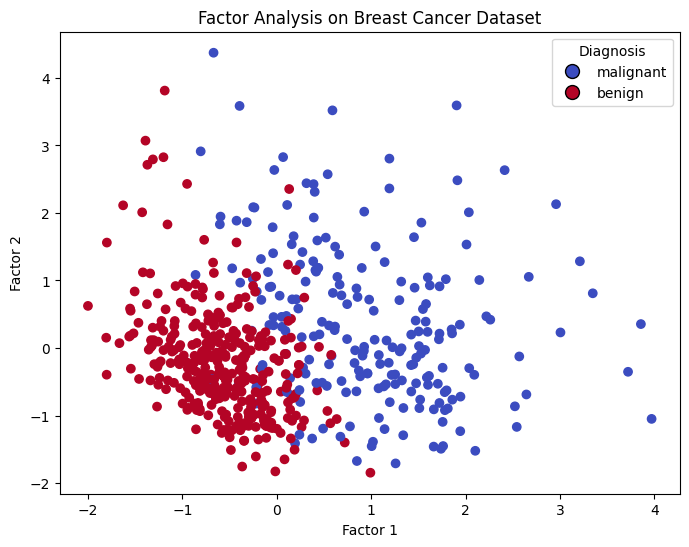

In [12]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Apply Factor Analysis
fa = FactorAnalysis(n_components=2, random_state=42)
X_fa = fa.fit_transform(X_scaled)

# Visualize the results
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_fa[:,0], X_fa[:,1], c=y, cmap='coolwarm')

# Create legend
targets = np.unique(y)
colors = [scatter.cmap(scatter.norm(t)) for t in targets]
labels = data.target_names

# Build custom legend
patches = [plt.Line2D([0], [0], marker='o', color='none',
                      label=labels[i], markerfacecolor=colors[i], markersize=10)
           for i in range(len(labels))]

plt.legend(handles=patches, title="Diagnosis")
plt.title('Factor Analysis on Breast Cancer Dataset')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()



# t-SNE with Interactive Visualization

*   t-SNE is effective for visualizing high-dimensional data in 2D.
*   The interactive plot allows exploration of clusters corresponding to different fashion items.



In [23]:
# import tensorflow as tf
# from tensorflow.keras.datasets import fashion_mnist

# # Load the Fashion-MNIST dataset
# (X_train, y_train), _ = fashion_mnist.load_data()
# X = X_train.reshape(-1, 28*28)
# y = y_train

# # Subsample for faster computation
# X_subset, _, y_subset, _ = train_test_split(X, y, train_size=5000, stratify=y, random_state=42)

# # Standardize the data
# X_scaled = StandardScaler().fit_transform(X_subset)

# # Apply t-SNE
# tsne = TSNE(n_components=2, perplexity=30, n_iter=5000, random_state=42)
# X_tsne = tsne.fit_transform(X_scaled)

# # Create a DataFrame for visualization
# df_tsne = pd.DataFrame({
#     'TSNE1': X_tsne[:, 0],
#     'TSNE2': X_tsne[:, 1],
#     'Label': y_subset
# })

# # Map numeric labels to class names
# class_names = [
#     'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#     'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
# ]
# df_tsne['Label Name'] = df_tsne['Label'].apply(lambda x: class_names[x])

# # Interactive Visualization with Plotly
# fig = px.scatter(
#     df_tsne, x='TSNE1', y='TSNE2', color='Label Name',
#     hover_data=['Label Name'],
#     title='t-SNE on Fashion-MNIST Dataset'
# )

# # Update layout
# fig.update_layout(
#     width=800,
#     height=600,
#     legend_title='Fashion Item',
#     template='plotly_dark'
# )

# fig.show()


# Install required libraries
!pip install -q plotly
!pip install -q ipywidgets

# Enable the widgets extension in Colab
from google.colab import output
output.enable_custom_widget_manager()

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import plotly.express as px
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

# Load the Fashion-MNIST dataset
(X_train, y_train), _ = fashion_mnist.load_data()
X = X_train.reshape(-1, 28*28)
y = y_train

# Subsample for faster computation
X_subset, _, y_subset, _ = train_test_split(X, y, train_size=2000, stratify=y, random_state=42)

# Standardize the data
X_scaled = StandardScaler().fit_transform(X_subset)

# Define class names
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Define the interactive function
def plot_tsne(perplexity):
    # Apply t-SNE with the given perplexity
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    # Create a DataFrame for visualization
    df_tsne = pd.DataFrame({
        'TSNE1': X_tsne[:, 0],
        'TSNE2': X_tsne[:, 1],
        'Label': y_subset
    })

    # Map numeric labels to class names
    df_tsne['Label Name'] = df_tsne['Label'].apply(lambda x: class_names[x])

    # Interactive Visualization with Plotly
    fig = px.scatter(
        df_tsne, x='TSNE1', y='TSNE2', color='Label Name',
        hover_data=['Label Name'],
        title=f't-SNE on Fashion-MNIST Dataset (Perplexity={perplexity})'
    )

    # Update layout
    fig.update_layout(
        width=800,
        height=600,
        legend_title='Fashion Item',
        template='plotly_dark'
    )

    fig.show()

# Create the interactive widget
interact(plot_tsne, perplexity=widgets.IntSlider(min=5, max=50, step=5, value=30))




interactive(children=(IntSlider(value=30, description='perplexity', max=50, min=5, step=5), Output()), _dom_cl…

<function __main__.plot_tsne(perplexity)>

# UMAP with Interactive Visualization

*   UMAP preserves both local and global data structure.
*   The interactive plot helps in examining how different individuals' faces cluster together.



In [14]:
# Load the Olivetti Faces dataset
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
X = faces.data
y = faces.target

# Apply UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

# Interactive Visualization with Plotly
df_umap = pd.DataFrame({'UMAP1': X_umap[:,0], 'UMAP2': X_umap[:,1], 'Label': y})

fig = px.scatter(df_umap, x='UMAP1', y='UMAP2', color='Label', title='UMAP on Olivetti Faces Dataset')
fig.show()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



# ISOMAP

*   Isomap unfolds the Swiss Roll, preserving the geodesic distances.
*   The visualization shows that the intrinsic 2D structure is recovered.



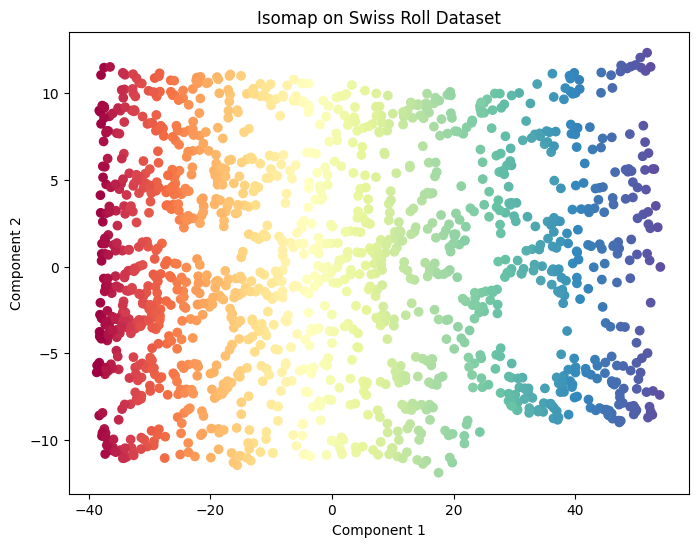

In [15]:
from sklearn.datasets import make_swiss_roll

# Generate the Swiss Roll dataset
X, color = make_swiss_roll(n_samples=1500, noise=0.05, random_state=42)

# Apply Isomap
isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X)

# Visualize the results
plt.figure(figsize=(8,6))
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=color, cmap='Spectral')
plt.title('Isomap on Swiss Roll Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


# Locally Linear Embedding (LLE)

*   LLE maps the high-dimensional S-curve into 2D while preserving local neighborhood structures.
*   The plot shows that the complex structure is successfully unraveled.



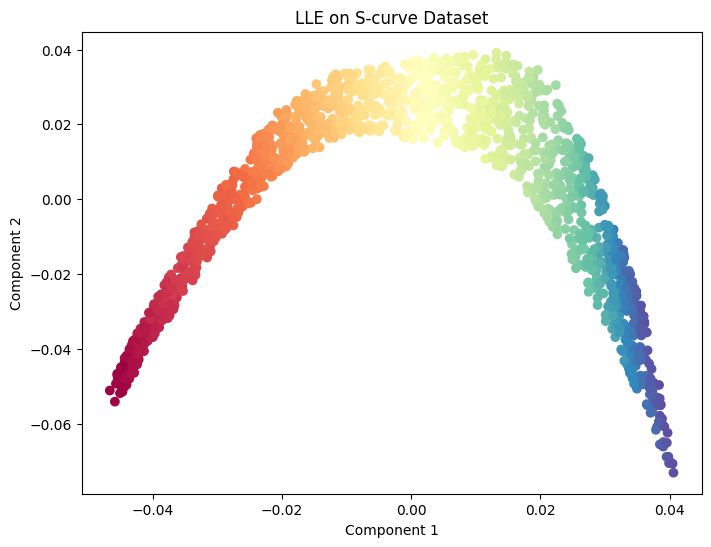

In [16]:
from sklearn.datasets import make_s_curve

# Generate the S-curve dataset
X, color = make_s_curve(n_samples=1500, noise=0.05, random_state=42)

# Apply LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=12, method='standard', random_state=42)
X_lle = lle.fit_transform(X)

# Visualize the results
plt.figure(figsize=(8,6))
plt.scatter(X_lle[:,0], X_lle[:,1], c=color, cmap='Spectral')
plt.title('LLE on S-curve Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


# Multidimensional Scaling (MDS)

*   MDS attempts to preserve pairwise distances between points.
*   The plot shows some overlap between classes, indicating limitations in preserving distances in lower dimensions.



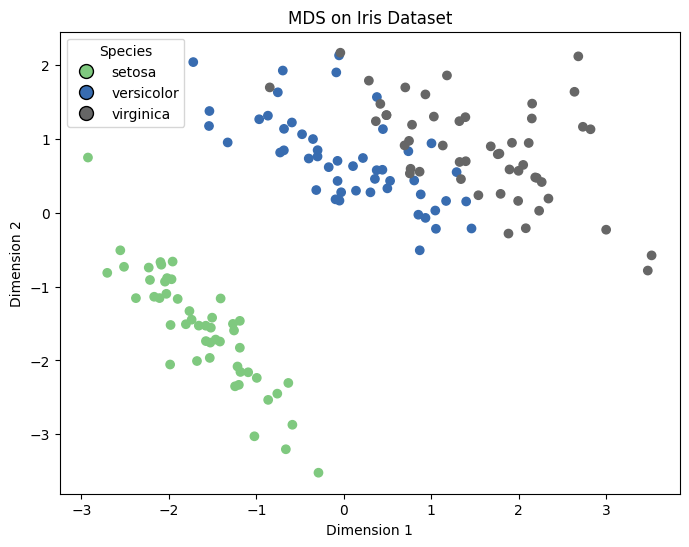

In [17]:
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Apply MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

# Visualize the results
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_mds[:,0], X_mds[:,1], c=y, cmap='Accent')

# Create legend
targets = np.unique(y)
colors = [scatter.cmap(scatter.norm(t)) for t in targets]
labels = data.target_names

# Build custom legend
patches = [plt.Line2D([0], [0], marker='o', color='none',
                      label=labels[i], markerfacecolor=colors[i], markersize=10)
           for i in range(len(labels))]

plt.legend(handles=patches, title="Species")
plt.title('MDS on Iris Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


# Autoencoders

*   The autoencoder compresses the data into a 2-dimensional latent space.
*   The visualization shows the separation between diabetic and non-diabetic patients to some extent.



Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.4414 - val_loss: 1.6636
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3062 - val_loss: 1.4963
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2267 - val_loss: 1.3833
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1136 - val_loss: 1.3113
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0472 - val_loss: 1.2635
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0416 - val_loss: 1.2265
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9964 - val_loss: 1.1983
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0191 - val_loss: 1.1736
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9379 - val_loss: 1.1557
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9744 - val_loss: 1.1375
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0024 - val_loss: 1.1197
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.9759 - val

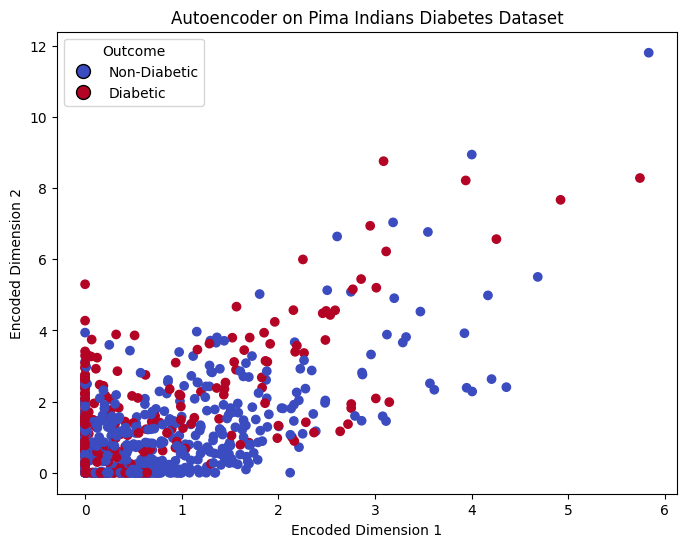

In [18]:
# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

X = df.iloc[:, :-1].values
y = df['Outcome'].values

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Split into training and testing
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Build the Autoencoder
input_dim = X_train.shape[1]
encoding_dim = 2  # Number of dimensions to encode into

# Define the encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(6, activation='relu')(input_layer)
encoder = Dense(encoding_dim, activation='relu')(encoder)

# Define the decoder
decoder = Dense(6, activation='relu')(encoder)
decoder = Dense(input_dim, activation='linear')(decoder)

# Combine encoder and decoder into an autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Extract the encoder part for dimensionality reduction
encoder_model = Model(inputs=input_layer, outputs=encoder)
X_encoded = encoder_model.predict(X_scaled)

# Visualize the results
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_encoded[:,0], X_encoded[:,1], c=y, cmap='coolwarm')

# Create legend
targets = np.unique(y)
colors = [scatter.cmap(scatter.norm(t)) for t in targets]
labels = ['Non-Diabetic', 'Diabetic']

# Build custom legend
patches = [plt.Line2D([0], [0], marker='o', color='none',
                      label=labels[i], markerfacecolor=colors[i], markersize=10)
           for i in range(len(labels))]

plt.legend(handles=patches, title="Outcome")
plt.title('Autoencoder on Pima Indians Diabetes Dataset')
plt.xlabel('Encoded Dimension 1')
plt.ylabel('Encoded Dimension 2')
plt.show()

